In [2]:
import ml_functions as mf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# import type-converted csv
df = mf.import_csv_data("./bg_initial_cols.csv")




/home/ng.chu/nemsis_project/clustering_data/ml_functions.py:16: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436263 entries, 0 to 1436262
Data columns (total 27 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   PcrKey                               1436263 non-null  int64  
 1   USCensusRegion                       1434561 non-null  object 
 2   USCensusDivision                     1434561 non-null  object 
 3   NasemsoRegion                        1434561 non-null  object 
 4   Urbanicity                           1394817 non-null  object 
 5   Age                                  1419207 non-null  float64
 6   Gender                               1436263 non-null  int64  
 7   Race                                 1175283 non-null  float64
 8   EMSDispatchCenterTimeMin             1025812 non-null  float64
 9   EMSChuteTimeMin                      1416531 non-null  float64
 10  EMSSystemResponseTimeMin             1431144 non-null  float64
 11

In [7]:
list(df.columns)



['PcrKey',
 'USCensusRegion',
 'USCensusDivision',
 'NasemsoRegion',
 'Urbanicity',
 'Age',
 'Gender',
 'Race',
 'EMSDispatchCenterTimeMin',
 'EMSChuteTimeMin',
 'EMSSystemResponseTimeMin',
 'EMSSceneResponseTimeMin',
 'EMSSceneTimeMin',
 'EMSSceneToPatientTimeMin',
 'EMSTransportTimeMin',
 'EMSTotalCallTimeMin',
 'ROSC',
 'EndOfEMS',
 'ResuscitationAttempted',
 'PriorUseOfAED',
 'ArrestRhythm',
 'ReasonToStopCPR',
 'ProtocolsUsed',
 'ProtocolAgeCategory',
 'ArrestWitnessedBy',
 'TypeOfCPRProvided',
 'CardiacRhythmOnArrivalAtDestination']

In [10]:
df

,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,Age,Gender,Race,EMSDispatchCenterTimeMin,EMSChuteTimeMin,...,EndOfEMS,ResuscitationAttempted,PriorUseOfAED,ArrestRhythm,ReasonToStopCPR,ProtocolsUsed,ProtocolAgeCategory,ArrestWitnessedBy,TypeOfCPRProvided,CardiacRhythmOnArrivalAtDestination
0,25944387,NaN,NaN,NaN,NaN,NaN,9906003,2514011.0,NaN,NaN,...,7701001,7701001.0,7701001,7701001,7701001,7701003.0,7701003.0,7701001.0,7701001.0,7701001.0
1,71121582,South,East South Central,South,Rural,23.0,9906003,2514005.0,0.183333,5.516667,...,3018003,3003007.0,3007001,3011001,3016005,9914075.0,3602003.0,3004007.0,7701001.0,9901003.0
2,71122461,South,East South Central,South,Urban,120.0,9906003,2514005.0,0.000000,0.750000,...,3018005,3003001.0,3007001,3011001,7701003,9914075.0,3602003.0,3004001.0,3009001.0,9901047.0
3,71122461,South,East South Central,South,Urban,120.0,9906003,2514005.0,0.000000,0.750000,...,3018005,3003001.0,3007001,3011001,7701003,9914075.0,3602003.0,3004001.0,3009007.0,9901047.0
4,71122461,South,East South Central,South,Urban,120.0,9906003,2514005.0,0.000000,0.750000,...,3018005,3003005.0,3007001,3011001,7701003,9914075.0,3602003.0,3004001.0,3009001.0,9901047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436258,131801707,Midwest,East North Central,Great Lakes,Urban,85.0,9906001,NaN,0.000000,6.000000,...,3018001,3003003.0,3007003,3011007,7701003,9914055.0,3602001.0,3004005.0,3009005.0,9901005.0
1436259,131801707,Midwest,East North Central,Great Lakes,Urban,85.0,9906001,NaN,0.000000,6.000000,...,3018001,3003003.0,3007003,3011007,7701003,9914055.0,3602001.0,3004005.0,3009013.0,9901005.0
1436260,131801707,Midwest,East North Central,Great Lakes,Urban,85.0,9906001,NaN,0.000000,6.000000,...,3018001,3003005.0,3007003,3011007,7701003,9914055.0,3602001.0,3004005.0,3009005.0,9901005.0
1436261,131801707,Midwest,East North Central,Great Lakes,Urban,85.0,9906001,NaN,0.000000,6.000000,...,3018001,3003005.0,3007003,3011007,7701003,9914055.0,3602001.0,3004005.0,3009013.0,9901005.0


In [20]:
selected_cols = ["Age", "Gender", "Race", "ArrestWitnessedBy", "ArrestRhythm", 
                 "CardiacRhythmOnArrivalAtDestination", "ResuscitationAttempted", 
                 "TypeOfCPRProvided", "PriorUseOfAED", "ReasonToStopCPR", "ROSC", "EndOfEMS"]

# Create a new DataFrame with selected columns
selected_df = df

# Convert all columns first to Int64 (handling non-numeric as NaN), then to string
for col in selected_cols:
    selected_df[col] = pd.to_numeric(selected_df[col], errors='coerce').astype('Int64').astype(str)

selected_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436263 entries, 0 to 1436262
Data columns (total 27 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   PcrKey                               1436263 non-null  int64  
 1   USCensusRegion                       1434561 non-null  object 
 2   USCensusDivision                     1434561 non-null  object 
 3   NasemsoRegion                        1434561 non-null  object 
 4   Urbanicity                           1394817 non-null  object 
 5   Age                                  1436263 non-null  object 
 6   Gender                               1436263 non-null  object 
 7   Race                                 1436263 non-null  object 
 8   EMSDispatchCenterTimeMin             1025812 non-null  float64
 9   EMSChuteTimeMin                      1416531 non-null  float64
 10  EMSSystemResponseTimeMin             1431144 non-null  float64
 11

In [21]:
selected_df



,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,Age,Gender,Race,EMSDispatchCenterTimeMin,EMSChuteTimeMin,...,EndOfEMS,ResuscitationAttempted,PriorUseOfAED,ArrestRhythm,ReasonToStopCPR,ProtocolsUsed,ProtocolAgeCategory,ArrestWitnessedBy,TypeOfCPRProvided,CardiacRhythmOnArrivalAtDestination
0,25944387,NaN,NaN,NaN,NaN,<NA>,9906003,2514011,NaN,NaN,...,7701001,7701001,7701001,7701001,7701001,7701003.0,7701003.0,7701001,7701001,7701001
1,71121582,South,East South Central,South,Rural,23,9906003,2514005,0.183333,5.516667,...,3018003,3003007,3007001,3011001,3016005,9914075.0,3602003.0,3004007,7701001,9901003
2,71122461,South,East South Central,South,Urban,120,9906003,2514005,0.000000,0.750000,...,3018005,3003001,3007001,3011001,7701003,9914075.0,3602003.0,3004001,3009001,9901047
3,71122461,South,East South Central,South,Urban,120,9906003,2514005,0.000000,0.750000,...,3018005,3003001,3007001,3011001,7701003,9914075.0,3602003.0,3004001,3009007,9901047
4,71122461,South,East South Central,South,Urban,120,9906003,2514005,0.000000,0.750000,...,3018005,3003005,3007001,3011001,7701003,9914075.0,3602003.0,3004001,3009001,9901047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436258,131801707,Midwest,East North Central,Great Lakes,Urban,85,9906001,<NA>,0.000000,6.000000,...,3018001,3003003,3007003,3011007,7701003,9914055.0,3602001.0,3004005,3009005,9901005
1436259,131801707,Midwest,East North Central,Great Lakes,Urban,85,9906001,<NA>,0.000000,6.000000,...,3018001,3003003,3007003,3011007,7701003,9914055.0,3602001.0,3004005,3009013,9901005
1436260,131801707,Midwest,East North Central,Great Lakes,Urban,85,9906001,<NA>,0.000000,6.000000,...,3018001,3003005,3007003,3011007,7701003,9914055.0,3602001.0,3004005,3009005,9901005
1436261,131801707,Midwest,East North Central,Great Lakes,Urban,85,9906001,<NA>,0.000000,6.000000,...,3018001,3003005,3007003,3011007,7701003,9914055.0,3602001.0,3004005,3009013,9901005


In [22]:
# Calculate NaN values in eTimes
def calculate_nan_percentage(df):
    # Replace 'Not Recorded', 'Not Applicable', '7701001', '7701003' with np.nan for calculation
    df_replaced = df.replace('Not Recorded', np.nan)
    df_replaced = df_replaced.replace('Not Applicable', np.nan)
    df_replaced = df_replaced.replace('7701001', np.nan)
    df_replaced = df_replaced.replace('7701003', np.nan)
    return df_replaced.isna().mean() * 100

# Calculate percentages for both groups
missing_val_percent_list = calculate_nan_percentage(selected_df)

print("Percentage of missing value in Group 1:\n", missing_val_percent_list)





Percentage of missing value in Group 1:
 PcrKey                                  0.000000
USCensusRegion                          0.118502
USCensusDivision                        0.118502
NasemsoRegion                           0.118502
Urbanicity                              2.885683
Age                                     0.000000
Gender                                  0.619455
Race                                   25.388386
EMSDispatchCenterTimeMin               28.577705
EMSChuteTimeMin                         1.373843
EMSSystemResponseTimeMin                0.356411
EMSSceneResponseTimeMin                 0.487446
EMSSceneTimeMin                        33.521089
EMSSceneToPatientTimeMin                4.746276
EMSTransportTimeMin                    44.254847
EMSTotalCallTimeMin                     0.232548
ROSC                                    7.203068
EndOfEMS                                5.723395
ResuscitationAttempted                  3.091286
PriorUseOfAED               

In [23]:
missing_val_dict = dict(missing_val_percent_list)
missing_val_dict



{'PcrKey': 0.0,
 'USCensusRegion': 0.11850197352434755,
 'USCensusDivision': 0.11850197352434755,
 'NasemsoRegion': 0.11850197352434755,
 'Urbanicity': 2.8856831931199234,
 'Age': 0.0,
 'Gender': 0.6194547934466041,
 'Race': 25.388386388843827,
 'EMSDispatchCenterTimeMin': 28.57770477969564,
 'EMSChuteTimeMin': 1.3738430914115312,
 'EMSSystemResponseTimeMin': 0.35641104728033796,
 'EMSSceneResponseTimeMin': 0.4874455444441582,
 'EMSSceneTimeMin': 33.52108910415432,
 'EMSSceneToPatientTimeMin': 4.746275577662308,
 'EMSTransportTimeMin': 44.25484747570605,
 'EMSTotalCallTimeMin': 0.23254793864354925,
 'ROSC': 7.203067961786942,
 'EndOfEMS': 5.723394670753198,
 'ResuscitationAttempted': 3.091286205938606,
 'PriorUseOfAED': 4.751218961986766,
 'ArrestRhythm': 9.00183322970793,
 'ReasonToStopCPR': 43.803467749291045,
 'ProtocolsUsed': 0.03265418659395946,
 'ProtocolAgeCategory': 0.03265418659395946,
 'ArrestWitnessedBy': 3.515303255740766,
 'TypeOfCPRProvided': 15.431017856757432,
 'Cardiac

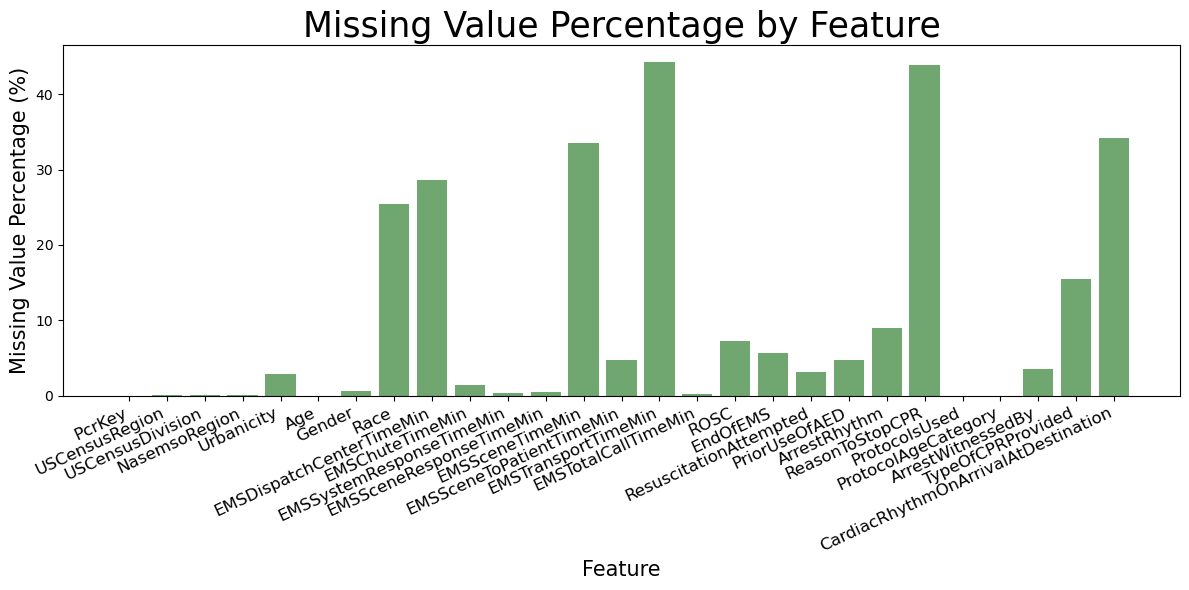

In [24]:
# Creating DataFrame
missing_val_df = pd.DataFrame(missing_val_percent_list)

# Setting color
color = (0.2, # redness
         0.5, # greenness
         0.2, # blueness
         0.7 # transparency
         ) 

# Plotting
plt.figure(figsize=(12, 6))  # Adjust the size as needed
plt.bar(missing_val_dict.keys(), missing_val_dict.values(), color=color)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Missing Value Percentage (%)', fontsize=15)
plt.title('Missing Value Percentage by Feature', fontsize=25)
plt.xticks(rotation=25, fontsize=12, ha='right')  # Rotates the feature names for better readability
plt.tight_layout()  # Adjusts the plot to fit into the figure area nicely
plt.show()



